# Laboratorio Optimización No. 9

> Daniel Alvarez - 201911320  
Maria Jose Vieda - 201923359

### Importacion de Librerias:

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numdifftools as nd

- Primer punto

- Definición de funciones

In [2]:
def fun1(x):
    return 3*(x[0]**2 + x[1]**2 ) + 4*x[0]*x[1] + 5*x[0] + 6*x[1] + 7

In [3]:
def fun2(x):
    return x[0]**2 + 2*x[1]**2 + 1/2*x[0]+ 5

In [4]:
def fun3(x):
    return (3*(1 - x[0])**2)*np.exp(-x[0]**2 - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2 - x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2 - x[1]**2)

In [117]:
def fun3n(x):
    return -1*((3*(1 - x[0])**2)*np.exp(-x[0]**2 - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2 - x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2 - x[1]**2))

In [158]:
def funD(x):
    return x[0]**2 + x[1]**2 + 8 

In [175]:
def hipe(x):
    return (x[0]**2)/2 - (x[1]**2)/2

- Valor inicial y cantidad de iteraciones

In [5]:
x0 = np.array([-0.5,-1.2])
k = 10**3

In [135]:
def decen(fun, x0, k, alpha):
    # igulamos el valor de iteracion 1 al punto inicial x0
    xk = x0
    # tomamos como parametro de parada la cantidad de iteración 
    # contando los ciclos
    cycle = 0
    # se crea una matriz que reagrupe la evolucion de los "x1" y "x2" 
    A = np.array([xk]).reshape(2,1)
    # se crea un bucle para iterar hasta los parametros de parada
    while not(cycle == k):
        # definimos el valor de la siguiente iteración x(k+1)
        # donde x(k+1) =  x(k) - alfa*gradiente
        xk_1 = xk - alpha*nd.Gradient(fun)(xk)
        # definimos el segundo criterio de parada para cuando
        # x(k+1) = x(k)
        if xk_1[0] == xk[0] and xk_1[-1] == xk[-1]:
            break
        else:
            # guardamos el dato de evolución
            A = np.concatenate((A, xk_1.reshape(2,1)), axis=1)
            # actualizamos la variable
            xk = xk_1
            # añadimos 1 ciclo 
            cycle +=1
    # retornamos la variable A
    return A

- Segundo Punto

- a

In [12]:
x0 = np.array([3,3])
k1 = 10**4
alfa = np.array([0.1, 0.3, 0.8, 1.1])
U = decen(fun2, x0, k1, alfa[0])
U1 = decen(fun2, x0, k1, alfa[1])

In [108]:
k2 = 4
U2 = decen(fun2, x0, k2, alfa[2])
U3 = decen(fun2, x0, k2, alfa[3])

In [13]:
print(U[0,-1])
print(U[1,-1])

-0.24999999999989228
6.480111018759491e-15


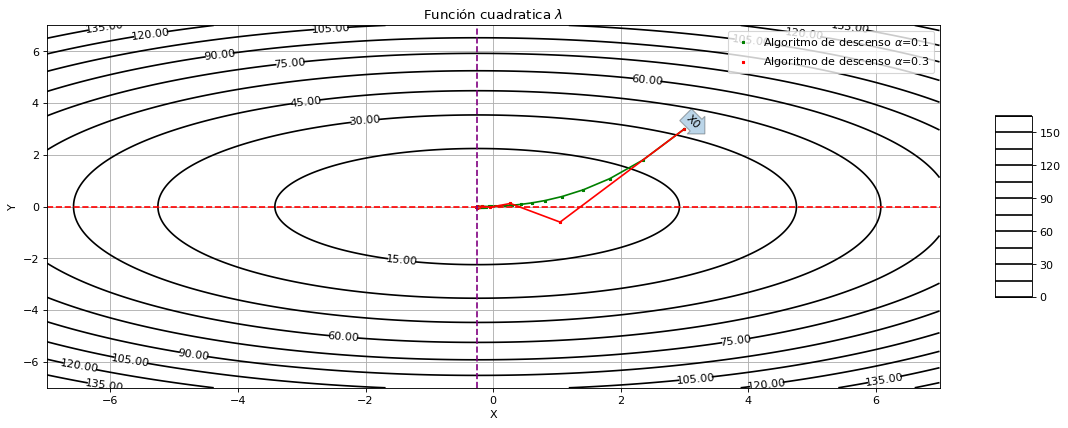

In [46]:
u = np.linspace(-7,7,1000)
x, y = np.meshgrid(u,u) 
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title(r"Función cuadratica $\lambda$")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
ax = plt.contour(x, y, fun2([x,y]), 10, colors='black')
plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.scatter(U[0,:],U[1,:],s=1, marker=',', color='green')
plt.scatter(U1[0,:],U1[1,:],s=1, marker=',', color='red')
# plt.scatter(U2[0,:],U2[1,:],s=1, marker=',', color='purple')
# plt.scatter(U3[0,:],U3[1,:],s=1, marker=',', color='green')
plt.plot(U[0,:],U[1,:], color='green')
plt.plot(U1[0,:],U1[1,:], color = 'red')
# plt.plot(U2[0,:],U2[1,:])
# plt.plot(U3[0,:],U3[1,:])
# plt.contourf(x, y, fun2([x,y]), 8, cmap='jet')
plt.grid()
plt.legend([r'Algoritmo de descenso $\alpha$=0.1', r'Algoritmo de descenso $\alpha$=0.3'])
plt.text(x0[0], x0[-1],'X0', rotation = -45,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))
plt.axhline(y = U[1,-1], color = 'r', linestyle = '--')
plt.axvline(x = U[0,-1], color = 'purple', linestyle = '--')
plt.colorbar(ax, shrink=0.5, aspect=5)

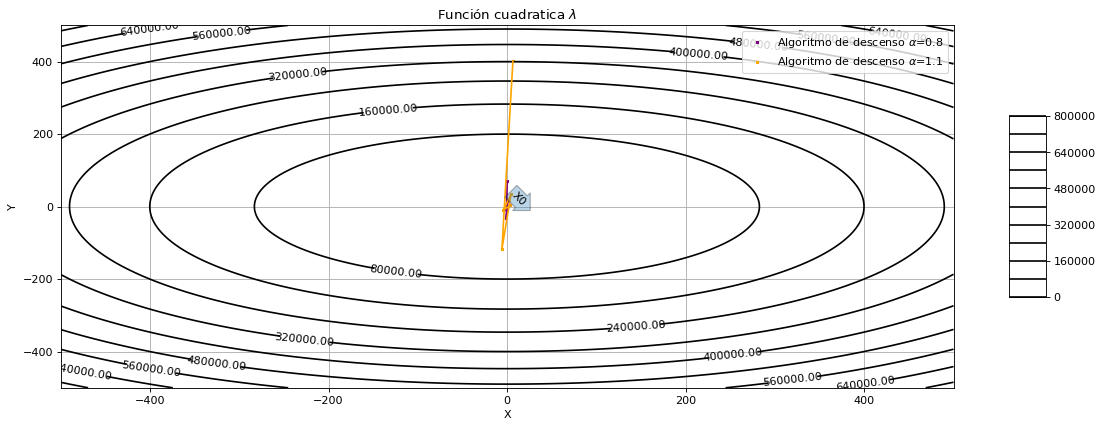

In [109]:
u = np.linspace(-500,500,1000)
x, y = np.meshgrid(u,u)
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title(r"Función cuadratica $\lambda$")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
ax = plt.contour(x, y, fun2([x,y]), 10, colors='black')
plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.scatter(U2[0,:],U2[1,:],s=1, marker=',', color='purple')
plt.scatter(U3[0,:],U3[1,:],s=1, marker=',', color='orange')
plt.plot(U2[0,:],U2[1,:], color='purple')
plt.plot(U3[0,:],U3[1,:], color='orange')
plt.grid()
plt.legend([r'Algoritmo de descenso $\alpha$=0.8', r'Algoritmo de descenso $\alpha$=1.1'])
plt.text(x0[0], x0[-1],'X0', rotation = -45,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))
plt.colorbar(ax, shrink=0.5, aspect=5)

- b

> La influencia del parámetro $\alpha$ en la convergencia del algoritmo se evidencia al al comparar los diferentes valores que toma dicho parámetro, del cual se observó que si este valor es muy grande puede converger muy rápido el sistema y no entregar una solución excata o correcta al problema; y si este valor es muy pequeño se demora bastante y podría no converger. Por lo que, se debe intentar encontrar un parámetro $\alpha$ ideal, para este caso correspondiendo al valor de $\alpha_1$ y $\alpha_2$. 

- Tercer Punto

- a.

In [58]:
x01 = np.array([-0.5, -1.2])
x02 = np.array([-2, -1])
x03 = np.array([1, 2])
x04 = np.array([2, 1])

In [102]:
k = 10**3
a = 0.05
C = decen(fun3, x01, k, a)
C1 = decen(fun3, x02, k, a)
C2 = decen(fun3, x03, k, a)
C3 = decen(fun3, x04, k, a)

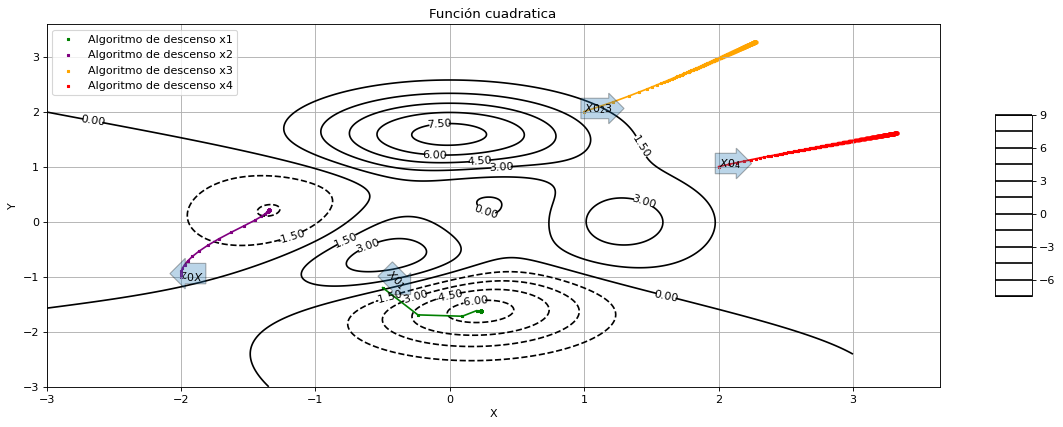

In [105]:
u = np.linspace(-3,3,1000)
x, y = np.meshgrid(u,u) 
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title("Función cuadratica minimos")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
ax = plt.contour(x, y, fun3([x,y]), 10, colors='black')
plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.scatter(C[0,:],C[1,:],s=1, marker=',', color='green')
plt.scatter(C1[0,:],C1[1,:],s=1, marker=',', color='purple')
plt.scatter(C2[0,:],C2[1,:],s=1, marker=',', color='orange')
plt.scatter(C3[0,:],C3[1,:],s=1, marker=',', color='red')
plt.plot(C[0,:],C[1,:],color='green')
plt.plot(C1[0,:],C1[1,:], color='purple')
plt.plot(C2[0,:],C2[1,:], color='orange')
plt.plot(C3[0,:],C3[1,:], color='red')
# plt.contourf(x, y, fun3([x,y]), 8, cmap='jet')
plt.grid()
plt.legend(['Algoritmo de descenso x1', 'Algoritmo de descenso x2', 'Algoritmo de descenso x3', 'Algoritmo de descenso x4'])
plt.text(x01[0], x01[-1],r'$X0_1$', rotation = -45,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))
plt.text(x02[0], x02[-1],r'$X0_2$',rotation = -180,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x03[0], x03[-1],r'$X0_23$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x04[0], x04[-1],r'$X0_4$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))            
# plt.axhline(y = C[1,-1], color = 'r', linestyle = '--')
# plt.axvline(x = C[0,-1], color = 'purple', linestyle = '--')
plt.colorbar(ax, shrink=0.5, aspect=5)

In [136]:
C = decen(fun3n, x01, k, a)
C1 = decen(fun3n, x02, k, a)
C2 = decen(fun3n, x03, k, a)
C3 = decen(fun3n, x04, k, a)

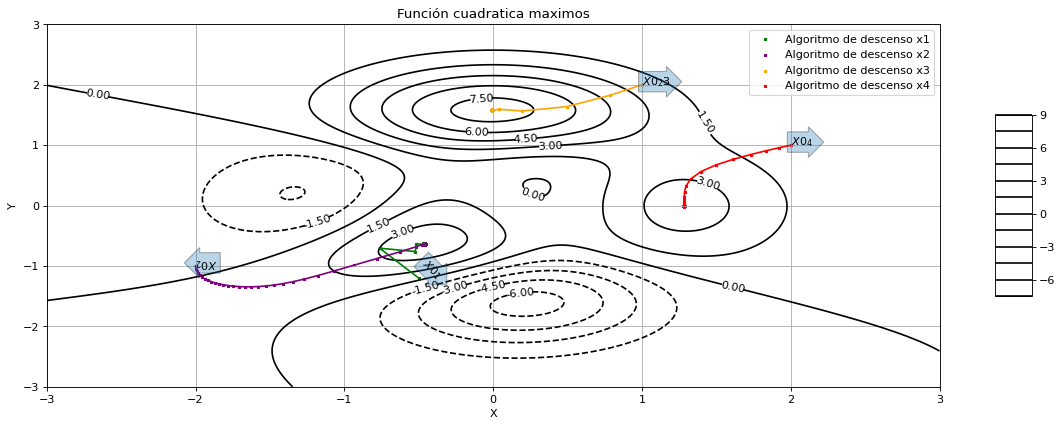

In [137]:
u = np.linspace(-3,3,1000)
x, y = np.meshgrid(u,u) 
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title("Función cuadratica maximos")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
ax = plt.contour(x, y, fun3([x,y]), 10, colors='black')
plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.scatter(C[0,:],C[1,:],s=1, marker=',', color='green')
plt.scatter(C1[0,:],C1[1,:],s=1, marker=',', color='purple')
plt.scatter(C2[0,:],C2[1,:],s=1, marker=',', color='orange')
plt.scatter(C3[0,:],C3[1,:],s=1, marker=',', color='red')
plt.plot(C[0,:],C[1,:],color='green')
plt.plot(C1[0,:],C1[1,:], color='purple')
plt.plot(C2[0,:],C2[1,:], color='orange')
plt.plot(C3[0,:],C3[1,:], color='red')
# plt.contourf(x, y, fun3([x,y]), 8, cmap='jet')
plt.grid()
plt.legend(['Algoritmo de descenso x1', 'Algoritmo de descenso x2', 'Algoritmo de descenso x3', 'Algoritmo de descenso x4'])
plt.text(x01[0], x01[-1],r'$X0_1$', rotation = -45,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))
plt.text(x02[0], x02[-1],r'$X0_2$',rotation = -180,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x03[0], x03[-1],r'$X0_23$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x04[0], x04[-1],r'$X0_4$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))            
# plt.axhline(y = C[1,-1], color = 'r', linestyle = '--')
# plt.axvline(x = C[0,-1], color = 'purple', linestyle = '--')
plt.colorbar(ax, shrink=0.5, aspect=5)

> Se puede notar que en la función existe tres máximos y dos minimos, junto con un corte cero, por lo que dependidendo del valor inicial $x_{0}$ converge al más cercano.

- b.

In [159]:
def decen_m(fun, x0, k, alpha, h = 10**-6):
    # igulamos el valor de iteracion 1 al punto inicial x0
    xk = x0
    # tomamos como parametro de parada la cantidad de iteración 
    # contando los ciclos
    cycle = 0
    # se crea una matriz que reagrupe la evolucion de los "x1" y "x2" 
    A = np.array([xk]).reshape(2,1)
    # se crea un bucle para iterar hasta los parametros de parada
    while not(cycle == k):
        # obtenemos el gradiente por definición de la derivada para 
        # todos los valores de xi desde 1 hasta n
        g = np.array([(fun([xk[0] + h, xk[-1]])-fun(xk))/h,(fun([xk[0], xk[-1] + h])-fun(xk))/h])
        # actualizamos la varible x(k+1) = x(k) - alfa*gradiente
        xk_1 = xk - alpha*g
        # definimos el segundo criterio de parada para cuando
        # x(k+1) = x(k)
        if xk_1[0] == xk[0] and xk_1[-1] == xk[-1]:
            break
        else:
            # guardamos el dato de evolución
            A = np.concatenate((A, xk_1.reshape(2,1)), axis=1)
            # actualizamos la variable
            xk = xk_1
            # añadimos 1 ciclo 
            cycle +=1
    # retornamos la variable A
    return A

In [148]:
k = 10**3
a = 0.05
C = decen_m(fun3, x01, k, a)
C1 = decen_m(fun3, x02, k, a)
C2 = decen_m(fun3, x03, k, a)
C3 = decen_m(fun3, x04, k, a)

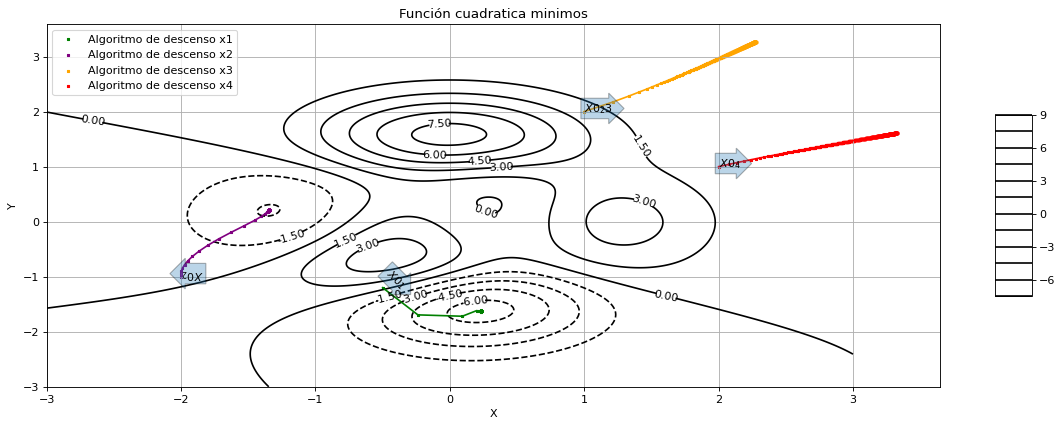

In [149]:
u = np.linspace(-3,3,1000)
x, y = np.meshgrid(u,u) 

# se define una figura para afectar su tamaño y densidad pixeles

figure(figsize=(18, 6), dpi=80)
plt.title("Función cuadratica minimos")
plt.xlabel("X")
plt.ylabel("Y")

# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices

ax = plt.contour(x, y, fun3([x,y]), 10, colors='black')

plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.scatter(C[0,:],C[1,:],s=1, marker=',', color='green')
plt.scatter(C1[0,:],C1[1,:],s=1, marker=',', color='purple')
plt.scatter(C2[0,:],C2[1,:],s=1, marker=',', color='orange')
plt.scatter(C3[0,:],C3[1,:],s=1, marker=',', color='red')
plt.plot(C[0,:],C[1,:],color='green')
plt.plot(C1[0,:],C1[1,:], color='purple')
plt.plot(C2[0,:],C2[1,:], color='orange')
plt.plot(C3[0,:],C3[1,:], color='red')

# plt.contourf(x, y, fun3([x,y]), 8, cmap='jet')

plt.grid()
plt.legend(['Algoritmo de descenso x1', 'Algoritmo de descenso x2', 'Algoritmo de descenso x3', 'Algoritmo de descenso x4'])
plt.text(x01[0], x01[-1],r'$X0_1$', rotation = -45,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))
plt.text(x02[0], x02[-1],r'$X0_2$',rotation = -180,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x03[0], x03[-1],r'$X0_23$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x04[0], x04[-1],r'$X0_4$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))            

# plt.axhline(y = C[1,-1], color = 'r', linestyle = '--')
# plt.axvline(x = C[0,-1], color = 'purple', linestyle = '--')

plt.colorbar(ax, shrink=0.5, aspect=5)

In [150]:
C = decen_m(fun3n, x01, k, a)
C1 = decen_m(fun3n, x02, k, a)
C2 = decen_m(fun3n, x03, k, a)
C3 = decen_m(fun3n, x04, k, a)

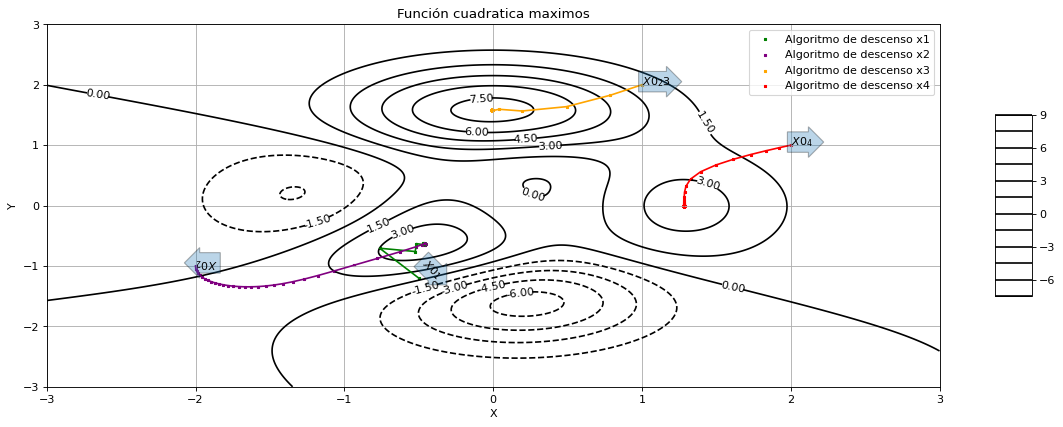

In [163]:
u = np.linspace(-3,3,1000)
x, y = np.meshgrid(u,u) 
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title("Función cuadratica maximos")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
ax = plt.contour(x, y, fun3([x,y]), 10, colors='black')
plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.scatter(C[0,:],C[1,:],s=1, marker=',', color='green')
plt.scatter(C1[0,:],C1[1,:],s=1, marker=',', color='purple')
plt.scatter(C2[0,:],C2[1,:],s=1, marker=',', color='orange')
plt.scatter(C3[0,:],C3[1,:],s=1, marker=',', color='red')
plt.plot(C[0,:],C[1,:],color='green')
plt.plot(C1[0,:],C1[1,:], color='purple')
plt.plot(C2[0,:],C2[1,:], color='orange')
plt.plot(C3[0,:],C3[1,:], color='red')
# plt.contourf(x, y, fun3([x,y]), 8, cmap='jet')
plt.grid()
plt.legend(['Algoritmo de descenso x1', 'Algoritmo de descenso x2', 'Algoritmo de descenso x3', 'Algoritmo de descenso x4'])
plt.text(x01[0], x01[-1],r'$X0_1$', rotation = -45,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))
plt.text(x02[0], x02[-1],r'$X0_2$',rotation = -180,
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x03[0], x03[-1],r'$X0_23$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3)) 
plt.text(x04[0], x04[-1],r'$X0_4$',
            bbox=dict(boxstyle="rarrow,pad=0.3", alpha = 0.3))            
# plt.axhline(y = C[1,-1], color = 'r', linestyle = '--')
# plt.axvline(x = C[0,-1], color = 'purple', linestyle = '--')
plt.colorbar(ax, shrink=0.5, aspect=5)

- c.

> El valor de $x_{0}$ afecta la convergencia del algoritmo, ya que, este no puede iterar infinitamente se comporta con respecto a la distancia a la que se encuentre de un máximo o un mínimo, si el valor de $\alpha$ es muy pequeño para un $x_{0}$ alejado el algoritmo no convergera convirtiendo al problema de convergencia un problema de discretización computacional, al no haber pasos continuos genera estos posibles errores de convergencia global.

- d.

> El valor de h compete un valor critico a la hora de la convergencia podemos partir de la definición:
$$\frac{\partial f}{\partial x_{1}} = \lim_{h\rightarrow 0}\frac{f(x_{1} + h, x_{2}, ..., x_{n}) - f(x_{1}, x_{2}, ..., x_{n})}{h}$$
> Por lo que si se tomara un valor de h que no tendiera a cero o no se aproximara por definición a la derivada no obtendriamos el gradiente en cada iteración del algoritmo, por el contrario, estariamos realizando el calculo de una función g que si bien depende de f(x) no corresponde a la pendiente de crecimiento de la curva de nivel, por lo que para valores grandes de h no convergeria, se estima que para un error menor a $10^{-4}$ con respecto a la original, el valor de h, debe ser menor o igual a $10^{-6}$.

- Cuarto Punto

- a.

> Teniendo en cuenta que el algoritmo se comporta como un sistema de control se tiene que evaluar primero para que función es globalmente convergente con el valor de $\alpha$ dado, en particular, asegurandose que la matriz dada por:

$$C = A - \lambda I$$

> Donde A es la matriz del sistema de decenso de gradiente en función de $\alpha$, para los cuales los valores propios de esta matriz deben encontrarse en el circulo unitario, acotando lo anterior, si existe una región que tenga como punto interior el valor de $x_{0}$, se puede asegurar que el algoritmo convergera a un minimo, en particular a el global si despues de interar bajo $x_{0}$ se cumple con lo siguiente:

$$\nabla f(x_{k}) = 0$$

> Partiendo del hecho de que la región $\mathbb{D}$ es convexa para todo su dominio por lo que existira al menos uno que cumpla para la region dada.

- b.

In [176]:
xb4 = [0.5, 0.5]
b4 = 100
E = decen(hipe, xb4, b4, 0.01)

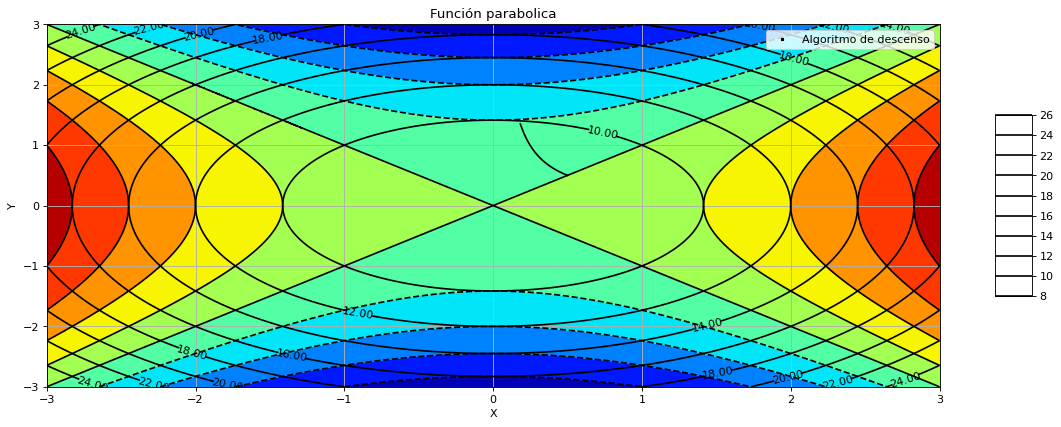

In [177]:
u = np.linspace(-3,3,1000)
x, y = np.meshgrid(u,u) 
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title("Función parabolica")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
ax = plt.contour(x, y, hipe([x,y]), 10, colors='black')
ax = plt.contour(x, y, funD([x,y]), 10, colors='black')
plt.scatter(E[0,:], E[1,:],s=1, marker=',', color='black')
plt.plot(E[0,:], E[1,:], color='black')
plt.clabel(ax, inline_spacing=1, fmt='%.2f',
           fontsize=10)
plt.contourf(x, y, hipe([x,y]), 8, cmap='jet')
plt.grid()
plt.legend(['Algoritmo de descenso'])           
# plt.axhline(y = C[1,-1], color = 'r', linestyle = '--')
# plt.axvline(x = C[0,-1], color = 'purple', linestyle = '--')
plt.colorbar(ax, shrink=0.5, aspect=5)